#### Autor: Bernardo Salinas Jaquez
#### Fecha: 3-Diciembre-2020
#### Regresión logísitca. Pacientes con cáncer de mama

### Objetivo
Aplicar el algoritmo de regresión logística para clasificar si un paciente tiene cáncer de mama o no de acuerdo a las características del tumor.

### Descripcíon
Se utilza mediante comandos e instrucciones de Python y un conjunto de datos de cáncer de mama que viene incluido en la librería sklearn el algoritmo de regresión logística para clasificar si un paciente que presenta un tumor con ciertas características puede llegar a ser un tumor benigno o maligno.

### Fundamento teórico

La regresión logística es un algoritmo supervisado y se utiliza para clasificación. Las etiquetas pueden ser “SI/NO”: binario o un número finito de "valores" o "etiquetas" o "clases": múltiple. [Bagnato, 2020]

Los algoritmos de clasificación se usan cuando el resultado deseado es un valor discreto en otras palabras son útiles cuando la respuesta al problema cae dentro de un conjunto finito de resultados posibles.

La regresión logística es un algoritmo supervisado y se utiliza para clasificación. Las etiquetas pueden ser “SI/NO”: binario o un número finito de "valores" o "etiquetas" o "clases": múltiple. [Bagnato, 2020]

#### 1. Cargar librerías

In [ ]:
import pandas as pd # Tratar con dataframes
from sklearn import datasets # Importar los conjuntos de datos de la librería sklearn
from sklearn.model_selection import train_test_split # Importar libreria para partir datos de entrenamiento y validación
from sklearn.preprocessing import StandardScaler # Importar libreria para escalar los datos
from sklearn.linear_model import LogisticRegression # Algoritmo a usar en este caso regresión logística
from sklearn.metrics import confusion_matrix # Matriz de confusión
from sklearn.metrics import precision_score # Verificar presición
from sklearn.metrics import accuracy_score # Verificar exactitud 
from sklearn.metrics import recall_score # Verificar sensibilidad
from sklearn.metrics import classification_report # Reporte de clasificación
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

#### 2. Cargar datos

* Mostrar los primeros cinco registros
* Mostrar los ultimos cinco registros

In [ ]:
dataset = datasets.load_breast_cancer() 

dataframe = pd.DataFrame(dataset.data, columns=dataset.feature_names)
dataframe['class'] = pd.Series(dataset.target)
dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
dataframe.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


#### 3. Limpieza de los datos
En este conjunto de datos no se presentan datos nulos o irregularidades en los datos, sin embargo según la lectura de otros casos de ejemplo para este mismo conjunto de datos se nos menciona que no todas las variables son relevantes por esa razón el dataframe se eliminarán las columnas que no son necesarias.


In [ ]:
dataframe = dataframe.drop(dataframe.iloc[:,10:30],axis=1)
dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


#### 4. Descripción de los datos
La variable dependiente es la llamada class y puede tener los siguientes valores
* 0 - Tumor Maligno
* 1 - Tumor Benigno

Las variables independientes son las siguientes:
* mean radius - Media de las distancias desde el centro hasta los puntos del perimetro
* mean texture - Desviación estandar de los valores de la escala de grises
* mean perimeter - Perimetro del tumor
* mean area - Area del tumor
* mean smoothness - Variaciones en la longitud del radio
* mean concavity - Medida calculada  por medio de la formula perimetro^2/area - 1.0
* mean concave points - Severidad de las porciones concavas del contorno
* mean symmetry - Simetria 
* mean fractal dimension - Aproximación a la costa (Zona sin tumor)


In [ ]:
dataframe.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,1.000000


* ¿Cuál es la cantidad de registros de clase 0 y 1?

In [ ]:
print(dataframe.groupby('class').size())

class
0    212
1    357
dtype: int64


#### 5. Visualización de datos

Histograma para visualizar la frecuencia de datos con respecto a class y el gráfico de densidad para la distribución general de los datos con respecto a class. Comparando con las características del conjunto de datos (Siendo lo de color rojo un tumor maligno y de color verde un tumor benigno):


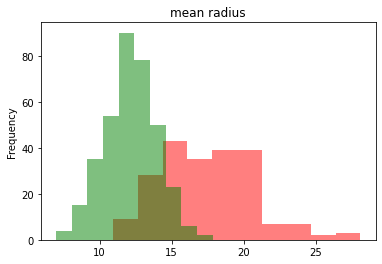

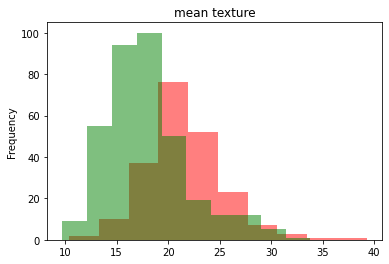

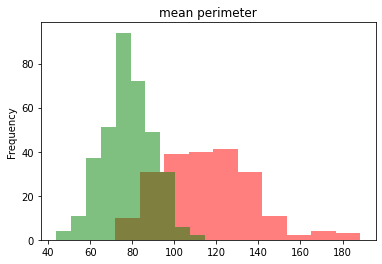

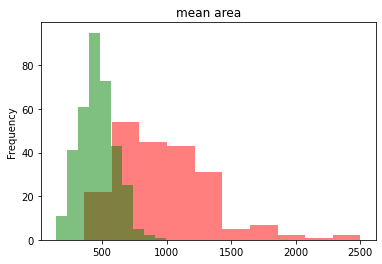

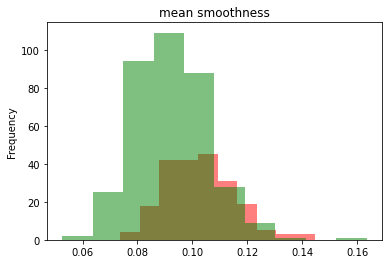

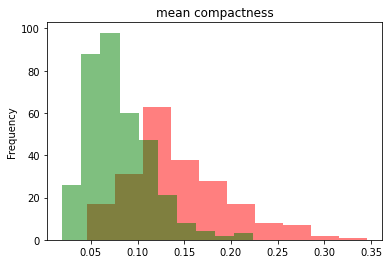

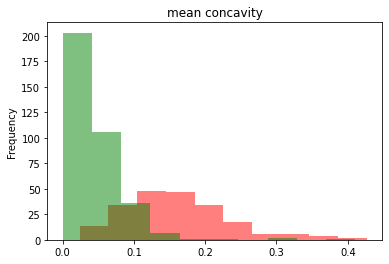

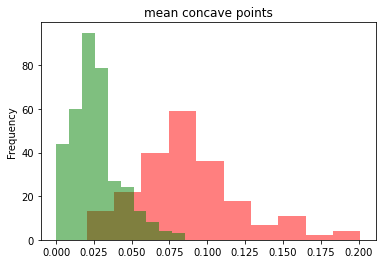

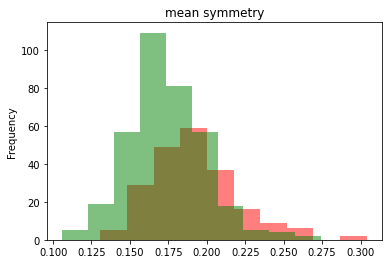

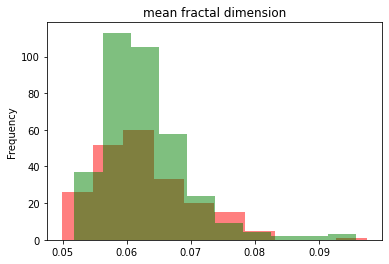

In [ ]:
for i in ('mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 
 'mean concave points', 'mean symmetry', 'mean fractal dimension'):
 plt.figure()
 dataframe[i][dataframe['class'] == 0].plot.hist(alpha=0.5,color='red',title=i)
 dataframe[i][dataframe['class'] == 1].plot.hist(alpha=0.5,color='green')
 plt.show()

En todos los histogramas, la frecuencia para tumor benigno es mayor que en tumores malignos, por esa razón el modelo puede que tenga mucha certeza para predecir tumores benignos.

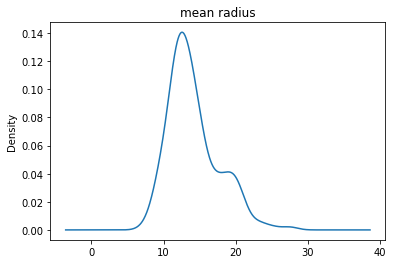

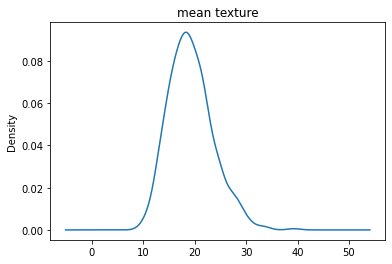

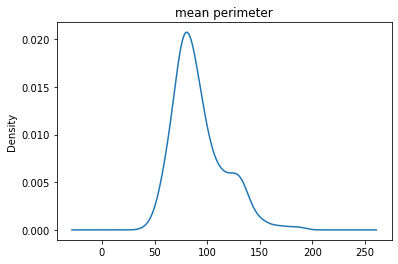

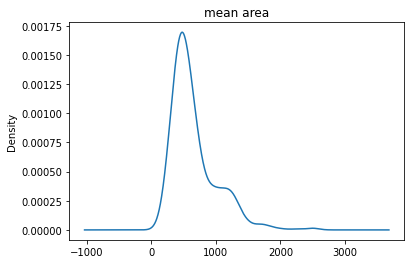

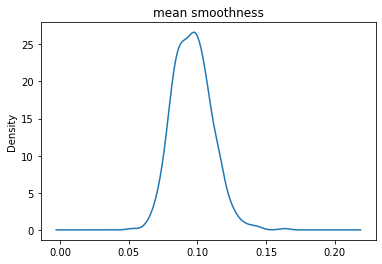

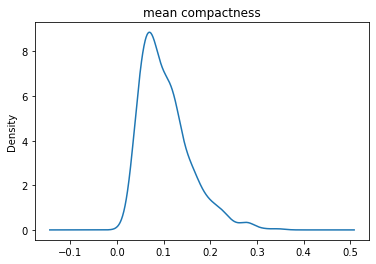

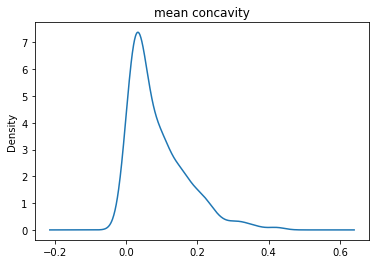

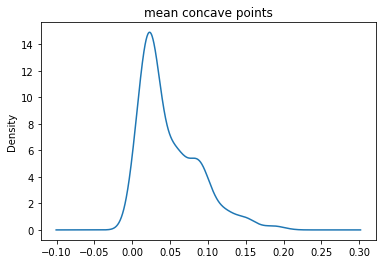

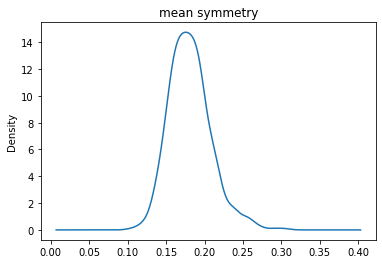

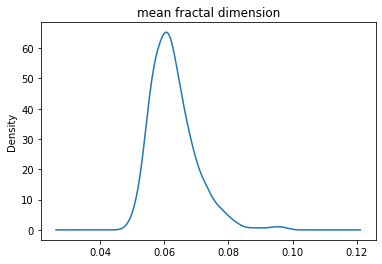

In [ ]:
for i in ('mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 
 'mean concave points', 'mean symmetry', 'mean fractal dimension'):
 dataframe[i].plot.kde(title = i)
 plt.show()

Las curvas son sesgadas de forma positiva. Claramente, esto se debe a que hay menos datos disponibles para tumor maligno (como lo vemos en la explicación de los datos).

#### 6. Datos de entrenamiento y validación

In [ ]:
X = np.array(dataframe.drop(['class'],1))
Y = np.array(dataframe['class'])
X.shape

(569, 10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

El siguiente paso que realizaremos es escalar los datos, esto se hace ya que las características son completamente distintas en magnitudes, unidades y rango por lo que lo mejor es escalarlos para llevarlos a un mismo nivel de magnitudes.

In [ ]:
escalar = StandardScaler()

In [ ]:
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#### 7. Creación del *modelo*

In [ ]:
modelo = LogisticRegression()

##### Modelo sin datos de entrenamiento y validación

In [ ]:
warnings.filterwarnings("ignore")
modelo.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

###### Predicciones

In [ ]:
predicciones = modelo.predict(X)

dataframe['prediccion'] = predicciones

dataframe.loc[0:50, [ 'class', 'prediccion']]

,class,prediccion
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
5,0,1
6,0,0
7,0,0
8,0,0
9,0,0


In [ ]:
print("El modelo es preciso en un ", round(modelo.score(X,Y) * 100, 4), "%")

El modelo es preciso en un  91.2127 %


##### Modelo con datos de entrenamiento y validación

In [ ]:
modelo.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predicciones= modelo.predict(X_test)

print("El modelo con datos de entrenamiento y validación tiene una exactitud en sus predicciones del ",accuracy_score(y_test, predicciones)*100,"%")

El modelo con datos de entrenamiento y validación tiene una exactitud en sus predicciones del  94.73684210526315 %


#### 8. Evaluación y validación del modelo

##### Matriz de confusión del modelo

In [ ]:
matriz = confusion_matrix(y_test, predicciones)
print("Matriz de Confusión:")
print(matriz)

Matriz de Confusión:
[[37  3]
 [ 3 71]]


##### Precición del modelo

In [ ]:
precision = precision_score(y_test, predicciones)
print("Precisión del modelo:")
print(precision)

Precisión del modelo:
0.9594594594594594


##### Puntaje F1Score combinación entre presición y sensibilidad

In [ ]:
puntajef1 = f1_score(y_test, predicciones)
print("Puntaje F1 del modelo:")
print(puntajef1)

Puntaje F1 del modelo:
0.9594594594594594


##### Reporte de clasificación

In [ ]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        40
           1       0.96      0.96      0.96        74

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



#### 9. Interpretación

En este caso se usa el modelo de regresión logística para clasificar un conjunto de datos de pacientes con tumores en la mama y en base a ciertas características saber si este es un tumor maligno o benigno. Para este caso se usa la variable class como variable dependiente la cual identifica si un tumor es benigno o maligno por medio de 0s y 1s si es 0 es un tumor Maligno y en caso de ser 1 es un tumor Benigno y las variables independientes son:

* mean radius - Media de las distancias desde el centro hasta los puntos del perimetro
* mean texture - Desviación estandar de los valores de la escala de grises
* mean perimeter - Perimetro del tumor
* mean area - Area del tumor
* mean smoothness - Variaciones en la longitud del radio
* mean concavity - Medida calculada  por medio de la formula perimetro^2/area - 1.0
* mean concave points - Severidad de las porciones concavas del contorno
* mean symmetry - Simetria 
* mean fractal dimension - Aproximación a la costa (Zona sin tumor)

Dentro del modelo se hizo de dos maneras sin datos de entrenamiento y validación y con datos de entrenamiento y validación en ambos casos se realizaron predicciones y se midió la precisión del caso, para el caso de no usar los datos de entrenamiento y validación se obtuvo una precisión del 91% en cambio con los datos de entrenamiento y validación se obtuvo una precisión del 95% lo que quiere decir que el modelo funciona aún mejor con los datos de entrenamiento y validación.
Al evaluar el modelo con la matriz de confusión y con el reporte de clasificación podemos ver que la precisión en acertar si es un tumor benigno es mayor que la precisión en acertar si es un tumor maligno siendo estas del 96% y del 93% respectivamente. Y teniendo en general el modelo una exactitud del 95% siendo esta muy buena. Y en cuanto a las demás estadísticas del modelo están relacionadas con la sensibilidad estas llegan a ser de un 95%, dando como conclusión que la regresión logística es muy buena para este conjunto de datos.


#### 10. Bibliografía

Libro

* Aprende Machine Learning Teoría + Práctica Python. Autor: Juan Ignacio Bagnato

Fundamento teórico

* https://aprendeia.com/diferencia-entre-algoritmos-de-clasificacion-y-regresion/#:~:text=Los%20algoritmos%20de%20clasificación%20se,conjunto%20finito%20de%20resultados%20posibles.

Obtención del caso

* https://aprendeia.com/algoritmo-regresion-logistica-machine-learning-practica-con-python/

* https://towardsdatascience.com/breast-cancer-cell-type-classifier-ace4e82f9a79

Documentación del caso

* https://goo.gl/U2Uwz2